In [1]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
GPU run command with Theano backend (with TensorFlow, the GPU is automatically used):
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatx=float32 python cifar10_cnn.py
It gets down to 0.65 test logloss in 25 epochs, and down to 0.55 after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,Convolution2D
from keras.callbacks import History 
import matplotlib.pyplot as plt
history = History()

Using TensorFlow backend.


In [2]:
num_classes = 10

In [3]:
# The data, shuffled and split between train and test sets:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
def getModel(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    # model.add(Conv2D(64, (3, 3)))
    # model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
   
    return(model)


def getGlobalAveragePoolingModel(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(num_classes, 1, 1, init='glorot_uniform',border_mode='valid'))
    model.add(AveragePooling2D((7,7)))
    model.add(Flatten())
    model.add(Activation("softmax"))
    return(model)
    
def plotGraph(history_20):

    plt.plot(history_20.history['acc'],'r-', label='Train Accuracy')
    plt.plot(history_20.history['val_acc'],'b-', label='Test Accuracy')
    plt.tick_params(labelright = True)
    plt.title('Train/Test Accuracy vs Epoch')
    plt.ylabel('Train/Test Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left', shadow=True)
    plt.show()

    # summarize history for loss
    plt.plot(history_20.history['loss'],'r-', label='Train Error')
    plt.plot(history_20.history['val_loss'],'b-', label='Test Error')
    plt.tick_params(labelright = True)
    plt.title('Train/Test Error vs Epoch')
    plt.ylabel('Train/Test Error')
    plt.xlabel('Epoch')
    plt.legend(['Train Error', 'Test Error'], loc='upper right', shadow=True)
    plt.show()

In [5]:
model = getGlobalAveragePoolingModel(num_classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

/home/adityav/.virtualenvs/cv/lib/python2.7/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), padding="valid", kernel_initializer="glorot_uniform")`


In [5]:
batch_size = 128
epochs = 25

In [ ]:
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

model = getModel(num_classes)

optList = [ keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.1, nesterov=False), 
            keras.optimizers.SGD(lr=0.01, momentum=0.7, decay=0.0, nesterov=True),   
            keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0), 
            keras.optimizers.rmsprop(lr=0.0001, decay=1e-6) ]
optName = ['Stocastic Gradient Descend','Nesterov','AdaGrad','RMSprop']



for name,optType in zip(optName,optList):
    opt = optType
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    history_20 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,callbacks = [history])
    print("Optimizer: ", name )
    plotGraph(history_20)
    
    print("\n\n\n")

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 4096/50000 [=>............................] - ETA: 173s - loss: 2.3102 - acc: 0.1040

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 233s - loss: 1.9200 - acc: 0.2994 - val_loss: 1.6925 - val_acc: 0.4064
Epoch 2/25
50000/50000 [==============================] - 247s - loss: 1.6571 - acc: 0.4071 - val_loss: 1.5743 - val_acc: 0.4482
Epoch 3/25
50000/50000 [==============================] - 219s - loss: 1.5425 - acc: 0.4446 - val_loss: 1.4342 - val_acc: 0.4905
Epoch 4/25
50000/50000 [==============================] - 210s - loss: 1.4550 - acc: 0.4746 - val_loss: 1.3701 - val_acc: 0.5210
Epoch 5/25
50000/50000 [==============================] - 206s - loss: 1.3932 - acc: 0.4991 - val_loss: 1.3259 - val_acc: 0.5309
Epoch 6/25
50000/50000 [==============================] - 202s - loss: 1.3395 - acc: 0.5209 - val_loss: 1.2999 - val_acc: 0.5469
Epoch 7/25
50000/50000 [==============================] - 209s - loss: 1.2989 - acc: 0.5376 - val_loss: 1.2172 - val_acc: 0.5768
Epoch 8/25
50000/50000 [=======================

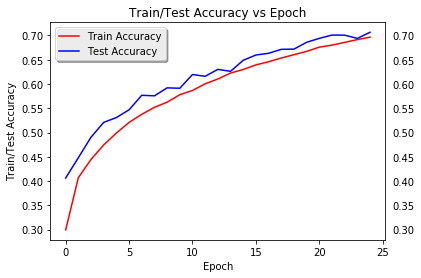

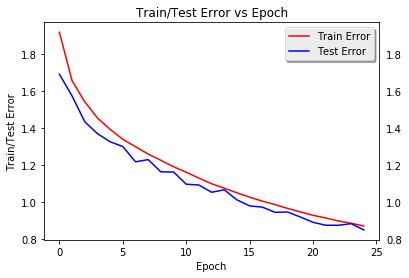

In [7]:
model = getModel(num_classes)

opt =             keras.optimizers.rmsprop(lr=0.0001, decay=1e-6) 
name = 'RMSprop'

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history_20 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,callbacks = [history])
print("Optimizer: ", name )
plotGraph(history_20)

print("\n\n\n")

/home/adityav/.virtualenvs/cv/lib/python2.7/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), padding="valid", kernel_initializer="glorot_uniform")`


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 193s - loss: 1.9319 - acc: 0.2736 - val_loss: 1.7682 - val_acc: 0.3507
Epoch 2/25
50000/50000 [==============================] - 230s - loss: 1.6977 - acc: 0.3672 - val_loss: 1.6711 - val_acc: 0.3767
Epoch 3/25
50000/50000 [==============================] - 196s - loss: 1.6278 - acc: 0.4008 - val_loss: 1.5818 - val_acc: 0.4151
Epoch 4/25
50000/50000 [==============================] - 184s - loss: 1.5906 - acc: 0.4168 - val_loss: 1.5463 - val_acc: 0.4386
Epoch 5/25
50000/50000 [==============================] - 186s - loss: 1.5643 - acc: 0.4308 - val_loss: 1.5274 - val_acc: 0.4520
Epoch 6/25
50000/50000 [==============================] - 218s - loss: 1.5420 - acc: 0.4415 - val_loss: 1.5194 - val_acc: 0.4561
Epoch 7/25
50000/50000 [==============================] - 212s - loss: 1.5218 - acc: 0.4531 - val_loss: 1.5008 - val_acc: 0.4606
Epoch 8/25
50000/50000 [=======================

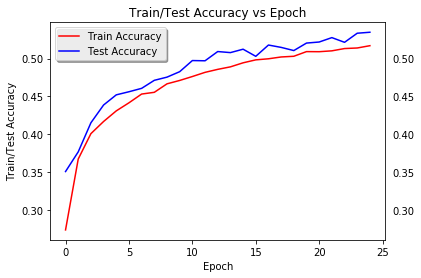

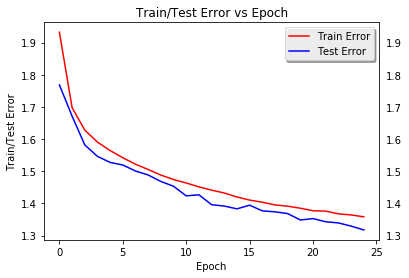

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model = getGlobalAveragePoolingModel(num_classes)
opt = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
name = 'AdaGrad'

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history_20 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,callbacks = [history])
print("Optimizer: ", name )
plotGraph(history_20)
print("\n\n\n")